# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("ex1data2.csv")

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [3]:
data

,size,nb_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [4]:
X = data.loc[:,['size', 'nb_bedrooms']].as_matrix()
y = data['price'].as_matrix()

### Initialisez theta (combien de dimensions?)

In [5]:
n = X.shape[1]
theta = np.zeros(n)

### Vérifiez les dimensions de theta et X. Sont-elles compatibles pour implémenter la fonction d'hypothèse?

In [6]:
theta.shape

(2,)

In [7]:
X.shape

(47, 2)

### Modifiez X en conséquence

In [8]:
X = X.T

## Écrivez une fonction pour normaliser les features

In [9]:
def featureNormalize(X):
    mean = X.mean(axis = 1)
    stdev = X.std(axis = 1)
    X = ((X.T - mean) / stdev).T
    return X, mean, stdev

def vectorNormalize(y):
    mean = y.mean()
    stdev = y.std()
    y = (y - mean) / stdev
    return y, mean, stdev

In [10]:
X, mean, stdev = featureNormalize(X)
y, y_mean, y_stdev = vectorNormalize(y)

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [11]:
def predict(X, theta):
    y = np.dot(theta.T, X)
    return y

In [12]:
def cost(X, y, theta):
    err = predict(X, theta) - y
    n, m = X.shape
    cost = np.dot(err, err.T) / (2. * m)
    return cost

In [13]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    n, m = X.shape
    J_history = []
    for i in range(num_iters):
        err = predict(X, theta) - y
        theta -= (alpha / m) * np.dot(X, err)
        J_history.append(cost(X, y, theta))
    return theta, J_history

## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

N'oubliez pas de récupérer la moyenne et l'écart-type calculés!

In [14]:
alpha = 0.01
num_iters = 5000
theta_trained, J_history = fit_with_cost(X, y, theta, alpha, num_iters)

## Visualisez l'évolution du coût (graphe de convergence)

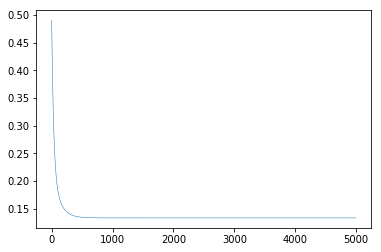

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [16]:
sample = (np.array([1650, 3]) - mean) / stdev
predict(sample, theta_trained) * y_stdev + y_mean

293081.46433828125